In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Concatenate
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df=pd.read_csv("data/train.csv",parse_dates=["Date"],index_col=[0])

In [3]:
print(df.index.freq)

None


In [4]:
df.shape

(5203, 5)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2001-01-25,356.730774,362.980774,352.403839,353.365387,197.122452
2001-01-26,357.211548,360.096161,342.788452,343.269226,191.490234
2001-01-29,345.153839,355.769226,338.461548,341.384613,190.439011
2001-01-30,344.307678,355.923065,341.692322,355.769226,198.463318
2001-01-31,359.615387,361.153839,350.461548,353.692322,197.304749


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-09-23,99.529999,104.080002,99.519997,102.959999,102.789993
2021-09-24,102.660004,104.199997,102.599998,103.800003,103.709198
2021-09-27,104.550003,106.330002,104.389999,105.349998,105.257835
2021-09-28,105.290001,106.750000,104.730003,105.730003,105.637512
2021-09-29,106.000000,107.000000,105.309998,106.279999,106.187027


In [7]:
test_split=round(len(df)*0.20)

In [8]:
test_split

1041

In [9]:
df_for_training=df[:-1041]
df_for_testing=df[-1041:]

In [10]:
print(df_for_training.shape)
print(df_for_testing.shape)

(4162, 5)
(1041, 5)


In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [12]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [13]:
df_for_training_scaled

array([[0.85398707, 0.86281807, 0.85292546, 0.8403402 , 0.82180889],
       [0.85533406, 0.85473269, 0.82623316, 0.8122593 , 0.79289309],
       [0.82155169, 0.84260459, 0.81422168, 0.80701755, 0.78749611],
       ...,
       [0.40689652, 0.40362224, 0.41960282, 0.40436458, 0.7632948 ],
       [0.40517242, 0.39995691, 0.41832161, 0.4075738 , 0.76889077],
       [0.40862067, 0.39974127, 0.41426436, 0.39880189, 0.75359571]])

In [14]:
df_for_training_scaled.shape

(4162, 5)

In [15]:
df_for_testing_scaled.shape

(1041, 5)

In [16]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)        

In [17]:
trainX, trainY=createXY(df_for_training_scaled, 30)

In [18]:
trainX.shape

(4132, 30, 5)

In [19]:
testX, testY=createXY(df_for_testing_scaled, 30)

In [20]:
trainX[0]

array([[0.85398707, 0.86281807, 0.85292546, 0.8403402 , 0.82180889],
       [0.85533406, 0.85473269, 0.82623316, 0.8122593 , 0.79289309],
       [0.82155169, 0.84260459, 0.81422168, 0.80701755, 0.78749611],
       [0.81918098, 0.84303579, 0.82319031, 0.8470261 , 0.8286929 ],
       [0.86206895, 0.85769729, 0.84753366, 0.84124952, 0.8227448 ],
       [0.85668106, 0.85295391, 0.85479397, 0.84659822, 0.82825271],
       [0.85129307, 0.85661925, 0.85372629, 0.84766796, 0.82935384],
       [0.8540948 , 0.88249248, 0.85799703, 0.88125807, 0.86394198],
       [0.88577588, 0.88227684, 0.88255396, 0.87590928, 0.85843431],
       [0.88189657, 0.87602422, 0.87016871, 0.86200256, 0.84411479],
       [0.88362063, 0.88357053, 0.87892376, 0.86606763, 0.84829995],
       [0.87047413, 0.86200956, 0.84390347, 0.8344031 , 0.81569511],
       [0.83857758, 0.87645542, 0.84966903, 0.87398378, 0.85645156],
       [0.88168102, 0.88012075, 0.88105913, 0.86649551, 0.84874037],
       [0.87090514, 0.86287196, 0.

In [21]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (4132, 30, 5)
trainY Shape--  (4132,)


In [22]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (1011, 30, 5)
testY Shape--  (1011,)


In [23]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.85398707 0.86281807 0.85292546 0.8403402  0.82180889]
 [0.85533406 0.85473269 0.82623316 0.8122593  0.79289309]
 [0.82155169 0.84260459 0.81422168 0.80701755 0.78749611]
 [0.81918098 0.84303579 0.82319031 0.8470261  0.8286929 ]
 [0.86206895 0.85769729 0.84753366 0.84124952 0.8227448 ]
 [0.85668106 0.85295391 0.85479397 0.84659822 0.82825271]
 [0.85129307 0.85661925 0.85372629 0.84766796 0.82935384]
 [0.8540948  0.88249248 0.85799703 0.88125807 0.86394198]
 [0.88577588 0.88227684 0.88255396 0.87590928 0.85843431]
 [0.88189657 0.87602422 0.87016871 0.86200256 0.84411479]
 [0.88362063 0.88357053 0.87892376 0.86606763 0.84829995]
 [0.87047413 0.86200956 0.84390347 0.8344031  0.81569511]
 [0.83857758 0.87645542 0.84966903 0.87398378 0.85645156]
 [0.88168102 0.88012075 0.88105913 0.86649551 0.84874037]
 [0.87090514 0.86287196 0.85949177 0.84724008 0.82891342]
 [0.85237065 0.88249248 0.8601324  0.88403941 0.86680588]
 [0.85668106 0.86589053 0.86248134 0.8630723  0.84521599]


In [24]:
trainY[0]

0.8297413960482309

In [25]:
trainY.shape

(4132,)

In [26]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,5)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss='mse', optimizer=optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator=grid_model,
                            param_grid=parameters,
                            cv=2)

C:\Users\zhongyanmin\AppData\Local\Temp\ipykernel_11888\1694479593.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [28]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
130/130 [==============================] - 5s 17ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 2/8
130/130 [==============================] - 2s 13ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 3/8
130/130 [==============================] - 2s 14ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/8
130/130 [==============================] - 2s 14ms/step - loss: 9.7356e-04 - val_loss: 0.0018
Epoch 5/8
130/130 [==============================] - 2s 13ms/step - loss: 8.3247e-04 - val_loss: 0.0014
Epoch 6/8
130/130 [==============================] - 2s 13ms/step - loss: 8.4000e-04 - val_loss: 0.0015
Epoch 7/8
130/130 [==============================] - 2s 14ms/step - loss: 7.8576e-04 - val_loss: 0.0015
Epoch 8/8
130/130 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 1/8
130/130 [==============================] - 5s 17ms/step - loss: 0.0102 - val_loss: 0.0012
Epoch 2/8
130/130 [==============================] - 2s 14ms/step - loss: 0.0029 - val_loss: 6.1888e-04


In [29]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}

In [30]:
my_model=grid_search.best_estimator_.model

In [31]:
my_model

In [32]:
prediction=my_model.predict(testX)

32/32 [==============================] - 1s 6ms/step


In [33]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.37054607]
 [0.37454885]
 [0.3777294 ]
 ...
 [0.1325311 ]
 [0.13581479]
 [0.1393308 ]]

Prediction Shape- (1011, 1)


In [34]:
prediction.shape

(1011, 1)

In [39]:
prediction_copies_array = np.repeat(prediction,5, axis=-1)

In [40]:
prediction_copies_array.shape

(1011, 5)

In [41]:
prediction_copies_array

array([[0.37054607, 0.37054607, 0.37054607, 0.37054607, 0.37054607],
       [0.37454885, 0.37454885, 0.37454885, 0.37454885, 0.37454885],
       [0.3777294 , 0.3777294 , 0.3777294 , 0.3777294 , 0.3777294 ],
       ...,
       [0.1325311 , 0.1325311 , 0.1325311 , 0.1325311 , 0.1325311 ],
       [0.13581479, 0.13581479, 0.13581479, 0.13581479, 0.13581479],
       [0.1393308 , 0.1393308 , 0.1393308 , 0.1393308 , 0.1393308 ]],
      dtype=float32)

In [42]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),5)))[:,0]

In [43]:
pred

array([184.17952 , 185.60822 , 186.74341 , ...,  99.22649 , 100.398506,
       101.65346 ], dtype=float32)

In [68]:
original_copies_array = np.repeat(testY,5, axis=-1)
original_copies_array.shape

(5055,)

In [69]:
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),5)))[:,0]

In [45]:
pred

array([184.17952 , 185.60822 , 186.74341 , ...,  99.22649 , 100.398506,
       101.65346 ], dtype=float32)

In [46]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [184.17952  185.60822  186.74341  ...  99.22649  100.398506 101.65346 ]

Original Values--  [191.692307 193.461533 192.307693 ... 104.550003 105.290001 106.      ]


In [47]:
import matplotlib.pyplot as plt

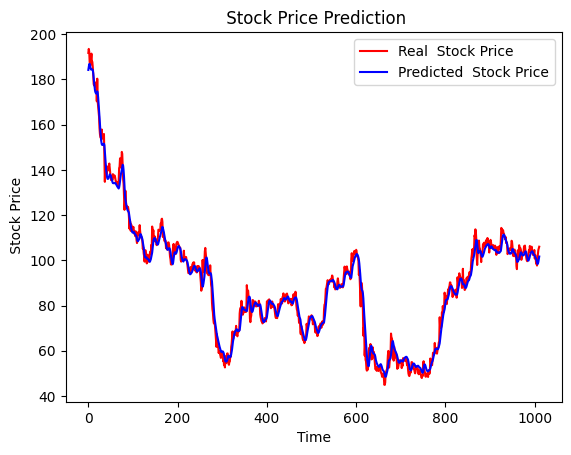

In [48]:
plt.plot(original, color = 'red', label = 'Real  Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [49]:
df_30_days_past=df.iloc[-30:,:]

In [50]:
df_30_days_past

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-08-18,101.080002,103.470001,100.760002,101.410004,101.242561
2021-08-19,100.000000,100.820000,98.599998,99.419998,99.255844
2021-08-20,99.589996,100.669998,99.099998,100.050003,99.884804
2021-08-23,100.599998,101.480003,100.269997,100.970001,100.803284
2021-08-24,101.290001,103.510002,101.059998,103.269997,103.099487
2021-08-25,103.360001,105.129997,102.550003,104.699997,104.527122
2021-08-26,104.459999,104.620003,102.839996,103.379997,103.209305
2021-08-27,103.900002,106.150002,103.900002,106.089996,105.914825
2021-08-30,106.330002,106.459999,104.800003,105.190002,105.016312


In [51]:
df_30_days_future=pd.read_csv("data/test.csv",parse_dates=["Date"],index_col=[0])
df_30_days_future.shape

(30, 4)

In [52]:
df_30_days_future

,High,Low,Close,Adj Close
Date,,,,
2021-09-30,107.089996,102.949997,103.029999,102.939865
2021-10-01,106.389999,103.669998,105.820000,105.727425
2021-10-04,107.080002,104.599998,104.900002,104.808235
2021-10-05,106.000000,103.750000,104.900002,104.808235
2021-10-06,104.419998,102.059998,104.330002,104.238731
2021-10-07,106.529999,104.330002,105.510002,105.417702
2021-10-08,106.220001,104.660004,104.720001,104.628387
2021-10-11,105.760002,103.970001,104.080002,103.988953
2021-10-12,104.040001,101.559998,102.720001,102.630142


In [53]:
df_30_days_future["Open"]=0
df_30_days_future=df_30_days_future[["Open","High","Low","Close","Adj Close"]]
old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_30_days_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [54]:
full_df.shape

(60, 5)

In [55]:
full_df.tail()

,0,1,2,3,4
55,NaN,0.143640,0.164162,0.150135,0.349458
56,NaN,0.152749,0.171268,0.159953,0.367565
57,NaN,0.154599,0.175349,0.159063,0.365924
58,NaN,0.171024,0.181345,0.167045,0.380645
59,NaN,0.161242,0.174766,0.160565,0.368694


In [56]:
full_df.shape

(60, 5)

In [57]:
full_df_scaled_array=full_df.values

In [58]:
full_df_scaled_array.shape

(60, 5)

In [59]:
all_data=[]
time_step=30
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 16ms/step


In [60]:
all_data

[array([[0.142616]], dtype=float32),
 array([[0.14408198]], dtype=float32),
 array([[0.14519966]], dtype=float32),
 array([[0.14585885]], dtype=float32),
 array([[0.14600044]], dtype=float32),
 array([[0.14541924]], dtype=float32),
 array([[0.1452817]], dtype=float32),
 array([[0.14512306]], dtype=float32),
 array([[0.14469734]], dtype=float32),
 array([[0.14350241]], dtype=float32),
 array([[0.14194821]], dtype=float32),
 array([[0.1407134]], dtype=float32),
 array([[0.1405344]], dtype=float32),
 array([[0.14061809]], dtype=float32),
 array([[0.14104457]], dtype=float32),
 array([[0.1420137]], dtype=float32),
 array([[0.1423119]], dtype=float32),
 array([[0.14227805]], dtype=float32),
 array([[0.1426411]], dtype=float32),
 array([[0.14433819]], dtype=float32),
 array([[0.14502671]], dtype=float32),
 array([[0.14518589]], dtype=float32),
 array([[0.14505011]], dtype=float32),
 array([[0.14539886]], dtype=float32),
 array([[0.14605115]], dtype=float32),
 array([[0.14641613]], dtype=floa

In [61]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,5, axis=-1)
y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),5)))[:,0]

In [62]:
y_pred_future_30_days

array([102.82602 , 103.34926 , 103.748184, 103.98347 , 104.034004,
       103.82656 , 103.77747 , 103.72085 , 103.5689  , 103.1424  ,
       102.58766 , 102.146935, 102.083046, 102.112915, 102.26514 ,
       102.611046, 102.71748 , 102.7054  , 102.83498 , 103.44071 ,
       103.68646 , 103.74327 , 103.69481 , 103.81928 , 104.0521  ,
       104.18237 , 104.162926, 104.596825, 105.19171 , 106.309204],
      dtype=float32)

In [63]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [65]:
my_model.save('model/Model_future_value.h5')
print('Model Saved!')

Model Saved!


In [66]:
scaler

MinMaxScaler()

In [67]:
import pickle
scalerfile = 'model/scaler_model_future_value.pkl'
pickle.dump(scaler, open(scalerfile, 'wb'))